In [106]:
if not "working_directory_corrected" in vars():
    %cd ..
    working_directory_corrected = True

# Neural Net Bigrams
- same approach as with the pure bigram model based on the probabilities of the data set, this time with a neural net with gradient based optimization
- idea is to predict a probability distribution based on the last character to find the new character
- the model is trained on list of names with the average negative log likelihood loss function established in the previous bigram model
- the label for each data point will be the next character

In [107]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [108]:
names = open("data/names.txt").read().splitlines()
len(names)

32033

In [109]:
chars = ["."] + sorted(list(set("".join(names))))
char2idx = {c: i for i, c in enumerate(chars)}
idx2char = {i: c for c, i in char2idx.items()}

In [110]:
# training set

xs, ys = [], []

for name in names[:1]:
    chrs = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(chrs, chrs[1:]):
        idx1 = char2idx[ch1]
        idx2 = char2idx[ch2]
        print(ch1, ch2)
        xs.append(idx1)
        ys.append(idx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [111]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [112]:
xs.shape

torch.Size([5])

In [113]:
x_enc = F.one_hot(xs, num_classes=27).float() # casting to float so nn can work with it
x_enc.shape

torch.Size([5, 27])

In [114]:
x_enc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

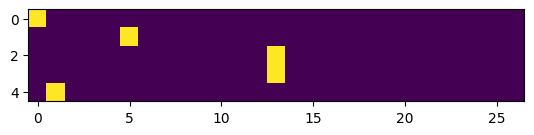

In [115]:
plt.imshow(x_enc)

In [116]:
x_enc, torch.randn((27, 1))

(tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 tensor([[-4.4146e-01],
         [ 1.5231e-01],
         [-1.4494e+00],
         [ 2.7560e-01],
         [ 5.6116e-01],
         [-1.1113e+00],
         [ 7.7931e-01],
         [ 2.4191e+00],
         [-1.0940e+00],
         [ 1.5545e-01],
         [-2.3725e+00],
         [-1.3023e-03],
         [-1.1881e+00],
         [ 8.5135e-02],
         [-1.9048

In [117]:
# initializing weights
# doing matrix multiplication with the encoded x's (batch of multiple)
# this will feed in all x's into every neuron at the same time, pytorch can do this in parallel

# x_enc (5, 27) @ weights (27, 1) -> (5, 1)

W = torch.randn((27, 1)) # -> one neuron, 27 inputs, one for each possible character
x_enc @ W # returns (5, 1) for 5 input x's, one activation which is dot product between the encoded x and the weights

tensor([[ 1.0084],
        [-0.5313],
        [-2.1653],
        [-2.1653],
        [-0.5696]])

In [118]:
# x_enc (5, 27) @ weights (27, 27) -> (5, 27)
# same but with 27 neurons

W = torch.randn((27, 27))
x_enc @ W

tensor([[-0.5996,  1.0208, -0.3593, -0.2678, -1.4562,  0.7491,  1.3048, -0.3991,
          1.4082, -0.8975, -0.5598,  0.3048, -2.1028, -1.1919,  1.6081, -0.8740,
          0.5782, -1.4467,  0.3671, -2.0086, -0.8246,  1.2905, -1.0359,  0.9531,
         -1.2308,  0.3878,  1.9702],
        [-0.2209,  0.4474,  0.3278,  2.4503, -0.6734, -1.6493,  0.5323, -0.9814,
         -0.2742, -1.3150,  0.6342, -0.2930, -0.8035,  0.4831, -0.1035,  1.1340,
         -1.1494, -0.7491, -0.6364, -1.9128, -0.2590,  0.9590, -0.2037, -0.6917,
          1.0863, -2.2623,  0.1662],
        [ 0.2401, -0.4756, -0.2860, -0.0945,  1.0118, -1.1178, -1.3437,  0.3383,
         -1.4291, -0.9784, -1.0982,  0.2308, -2.2329, -1.6857,  0.9106,  0.1198,
          0.2822,  0.1316, -0.5156, -0.4164, -0.4640, -0.1477,  2.0853,  0.4599,
          0.8305, -0.0140,  0.4603],
        [ 0.2401, -0.4756, -0.2860, -0.0945,  1.0118, -1.1178, -1.3437,  0.3383,
         -1.4291, -0.9784, -1.0982,  0.2308, -2.2329, -1.6857,  0.9106,  0.1198

In [119]:
(x_enc @ W).shape

torch.Size([5, 27])

In [120]:
(x_enc @ W)[3, 13] # 3rd x, 13th neuron

tensor(-1.6857)

In [121]:
# W has weights in columns, each col is a neuron
# input has same number of columns as number of rows in W -> each row in x_enc is dotted with each row in W

In [122]:
x_enc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [123]:
W[13]

tensor([ 0.2401, -0.4756, -0.2860, -0.0945,  1.0118, -1.1178, -1.3437,  0.3383,
        -1.4291, -0.9784, -1.0982,  0.2308, -2.2329, -1.6857,  0.9106,  0.1198,
         0.2822,  0.1316, -0.5156, -0.4164, -0.4640, -0.1477,  2.0853,  0.4599,
         0.8305, -0.0140,  0.4603])

In [124]:
(x_enc[3] * W[:, 13]).sum()

tensor(-1.6857)

In [125]:
# we need something interpretable from the model
# going back to the matrix of counts and then probs we had in the other bigram model
# we make 27 neurons each getting 27 inputs from the one hot encoded character

(x_enc @ W).exp() # exponentiate to make values negative between 0 and 1 and positive more positive<

tensor([[ 0.5491,  2.7755,  0.6982,  0.7650,  0.2331,  2.1152,  3.6869,  0.6709,
          4.0884,  0.4076,  0.5713,  1.3564,  0.1221,  0.3037,  4.9931,  0.4173,
          1.7828,  0.2354,  1.4435,  0.1342,  0.4384,  3.6346,  0.3549,  2.5937,
          0.2920,  1.4738,  7.1724],
        [ 0.8018,  1.5642,  1.3879, 11.5914,  0.5100,  0.1922,  1.7028,  0.3748,
          0.7602,  0.2685,  1.8855,  0.7460,  0.4478,  1.6210,  0.9017,  3.1081,
          0.3168,  0.4728,  0.5292,  0.1477,  0.7718,  2.6090,  0.8157,  0.5007,
          2.9632,  0.1041,  1.1808],
        [ 1.2713,  0.6215,  0.7513,  0.9098,  2.7506,  0.3270,  0.2609,  1.4025,
          0.2395,  0.3759,  0.3335,  1.2596,  0.1072,  0.1853,  2.4858,  1.1272,
          1.3260,  1.1407,  0.5971,  0.6594,  0.6287,  0.8627,  8.0466,  1.5839,
          2.2944,  0.9861,  1.5845],
        [ 1.2713,  0.6215,  0.7513,  0.9098,  2.7506,  0.3270,  0.2609,  1.4025,
          0.2395,  0.3759,  0.3335,  1.2596,  0.1072,  0.1853,  2.4858,  1.1272

In [126]:
(x_enc @ W).exp().shape

torch.Size([5, 27])

In [127]:
logits = x_enc @ W # log counts
counts = logits.exp() # equivalent to counts matrix we had in other bigram model
probs = counts / counts.sum(1, keepdims=True) # normalize again across columns to get probs
# => this is a softmax activation function
# > allows to take in positive and negative numbers from a previous layer and makes them into a probability distribution
#   with numbers between 0 and 1 and that sums to 1
probs

tensor([[0.0127, 0.0641, 0.0161, 0.0177, 0.0054, 0.0488, 0.0851, 0.0155, 0.0944,
         0.0094, 0.0132, 0.0313, 0.0028, 0.0070, 0.1153, 0.0096, 0.0412, 0.0054,
         0.0333, 0.0031, 0.0101, 0.0839, 0.0082, 0.0599, 0.0067, 0.0340, 0.1656],
        [0.0209, 0.0409, 0.0363, 0.3028, 0.0133, 0.0050, 0.0445, 0.0098, 0.0199,
         0.0070, 0.0493, 0.0195, 0.0117, 0.0424, 0.0236, 0.0812, 0.0083, 0.0124,
         0.0138, 0.0039, 0.0202, 0.0682, 0.0213, 0.0131, 0.0774, 0.0027, 0.0309],
        [0.0373, 0.0182, 0.0220, 0.0267, 0.0806, 0.0096, 0.0076, 0.0411, 0.0070,
         0.0110, 0.0098, 0.0369, 0.0031, 0.0054, 0.0729, 0.0330, 0.0389, 0.0334,
         0.0175, 0.0193, 0.0184, 0.0253, 0.2358, 0.0464, 0.0672, 0.0289, 0.0464],
        [0.0373, 0.0182, 0.0220, 0.0267, 0.0806, 0.0096, 0.0076, 0.0411, 0.0070,
         0.0110, 0.0098, 0.0369, 0.0031, 0.0054, 0.0729, 0.0330, 0.0389, 0.0334,
         0.0175, 0.0193, 0.0184, 0.0253, 0.2358, 0.0464, 0.0672, 0.0289, 0.0464],
        [0.0109, 0.0276,

In [128]:
probs.shape # we get a matrix with 5 

torch.Size([5, 27])

In [129]:
probs[0].sum()

tensor(1.0000)

In [130]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print("- - - - - -")
    print(f"bigram: {idx2char[x]}, {idx2char[y]} at {x}, y")
    print(f"input: {x}")
    print(f"output: {probs[i]}")
    print(f"actual: {y}")
    prob = probs[i, y]
    print(f"prob by nn: {prob}")
    logp = torch.log(prob)
    print(f"log likelihood : {logp}")
    nll = -logp
    print(f"negative log likelihood: {nll}")
    nlls[i] = nll

print("======")
print("average nll/loss = ", nlls.mean().item())

- - - - - -
bigram: ., e at 0, y
input: 0
output: tensor([0.0127, 0.0641, 0.0161, 0.0177, 0.0054, 0.0488, 0.0851, 0.0155, 0.0944,
        0.0094, 0.0132, 0.0313, 0.0028, 0.0070, 0.1153, 0.0096, 0.0412, 0.0054,
        0.0333, 0.0031, 0.0101, 0.0839, 0.0082, 0.0599, 0.0067, 0.0340, 0.1656])
actual: 5
prob by nn: 0.0488387793302536
log likelihood : -3.019230604171753
negative log likelihood: 3.019230604171753
- - - - - -
bigram: e, m at 5, y
input: 5
output: tensor([0.0209, 0.0409, 0.0363, 0.3028, 0.0133, 0.0050, 0.0445, 0.0098, 0.0199,
        0.0070, 0.0493, 0.0195, 0.0117, 0.0424, 0.0236, 0.0812, 0.0083, 0.0124,
        0.0138, 0.0039, 0.0202, 0.0682, 0.0213, 0.0131, 0.0774, 0.0027, 0.0309])
actual: 13
prob by nn: 0.04235075041651726
log likelihood : -3.161769151687622
negative log likelihood: 3.161769151687622
- - - - - -
bigram: m, m at 13, y
input: 13
output: tensor([0.0373, 0.0182, 0.0220, 0.0267, 0.0806, 0.0096, 0.0076, 0.0411, 0.0070,
        0.0110, 0.0098, 0.0369, 0.0031, 0.00

## Optimization

In [131]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [132]:
W = torch.randn((27, 27), requires_grad=True)

### Forward pass

In [133]:
xenc = F.one_hot(xs, num_classes=27).float() # input to nn, one hot encoding
logits = x_enc @ W # predict log counts
counts = logits.exp() # counts equivalent to N in other bigram model
probs = counts / counts.sum(1, keepdim=True) # probabilities for next character

In [134]:
probs[torch.arange(5), ys] # probabilities for the next characters for each input character

tensor([0.0768, 0.0040, 0.0646, 0.0689, 0.1525], grad_fn=<IndexBackward0>)

In [135]:
loss = -probs[torch.arange(5), ys].log().mean()
loss.item()

3.077178478240967

### Backward pass

In [136]:
W.grad = None # set the gradients to 0
loss.backward() # calculate the gradients

In [137]:
W.data += -0.1 * W.grad

### Repeat

In [138]:
# training set
xs, ys = [], []

for name in names: # use all names this time
    chrs = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(chrs, chrs[1:]):
        idx1 = char2idx[ch1]
        idx2 = char2idx[ch2]
        xs.append(idx1)
        ys.append(idx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
num

228146

In [139]:
W = torch.randn((27, 27), requires_grad=True)

losses = []
for k in range(100):

    # forward
    x_enc = F.one_hot(xs, num_classes=27).float()
    logits = x_enc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() # loss + regularization (see model smoothing in other bigrams)

    # backward
    W.grad = None
    loss.backward()

    # update
    W.data += -50 * W.grad

    print(f"{k}: {loss.item()}")
    losses.append(loss.item())

0: 3.8108768463134766
1: 3.4195897579193115
2: 3.1692888736724854
3: 3.0117223262786865
4: 2.9107789993286133
5: 2.837972640991211
6: 2.7843844890594482
7: 2.744659185409546
8: 2.7144103050231934
9: 2.6904869079589844
10: 2.6708831787109375
11: 2.6543824672698975
12: 2.640231132507324
13: 2.627938747406006
14: 2.6171650886535645
15: 2.607661008834839
16: 2.599233388900757
17: 2.591726064682007
18: 2.5850095748901367
19: 2.5789730548858643
20: 2.57352352142334
21: 2.5685830116271973
22: 2.5640835762023926
23: 2.5599710941314697
24: 2.556197166442871
25: 2.552722692489624
26: 2.549513101577759
27: 2.546539068222046
28: 2.5437750816345215
29: 2.5411994457244873
30: 2.5387935638427734
31: 2.5365402698516846
32: 2.534425735473633
33: 2.5324363708496094
34: 2.530561923980713
35: 2.5287926197052
36: 2.5271193981170654
37: 2.5255343914031982
38: 2.524031400680542
39: 2.52260422706604
40: 2.521246910095215
41: 2.519955635070801
42: 2.5187246799468994
43: 2.5175511837005615
44: 2.516430616378784

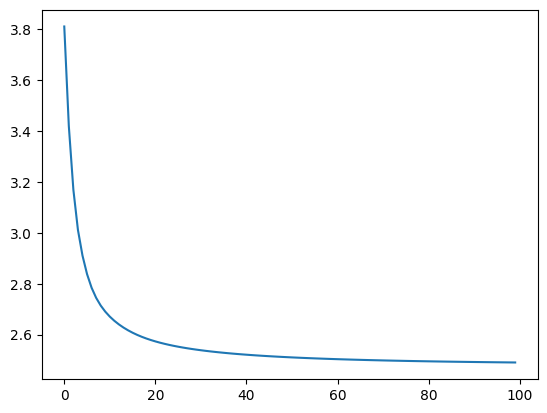

In [140]:
plt.plot(losses)

- this gets quite close to the manual approach before, this time with gradient based learning
- makes sense that it's not better because there is no additional information
- easier here to keep them in a table, gradient based is much more flexible in how it can be expanded

- only thing that will fundamentally change is how we get logits. we can in more information here

In [141]:
for i in range(10):

    out = []
    ix = 0
    while True:
        x_enc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = x_enc @ W
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdim=True)

        ix = torch.multinomial(probs, num_samples=1, replacement=True).item()
        out.append(idx2char[ix])
        if ix == 0:
            break
    print("".join(out))

eenanei.
haiaviamethaie.
bearunnde.
cyr.
iaicarimiten.
jos.
shan.
styrjan.
kaiet.
krarincoahl.
